<a href="https://colab.research.google.com/github/dan-santos/data-science/blob/master/Color_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução**
---
Não é dúvida para ninguém que a área de Data Science, embora não seja tão nova quanto a maioria das pessoa pensam (seus primeiros escritos e postulados remontam à decada de 70), é um universo à parte da área de computação. Isto porque, além de envolver programação em si, também está fortemente ligada com estrutura de dados, análise de algoritmos, matemática conceitual e aplicada, entre outros.


Uma vertente que tem crescido vertiginosamente nos últimos anos é o que chamamos de [Visão Computacional](https://datascienceacademy.com.br/blog/o-que-e-visao-computacional/), que, de forma muito resumida, consiste em "dar a capacidade de enxergar a uma máquina", ou seja, nessa vertente aplicamos o conhecimento da ciência de dados para detectar, reconhecer, segmentar e reconstruir bi e tridimionsalmente imagens, vídeos, etc.

Podemos ver a aplicação desse conceito em diversos campos do nosso cotidiano: Reconhecimento facial feito na tela de bloqueio de smartphones, reconstrução 3D para preservação de patrimônio histórico-cultural da sociedade (esculturas, construções, artefatos, etc), como o Laboratório VisGraf - Laboratório de Visão e Computação Gráfica do IMPA (Instituto de Matemática Pura e Aplicada), que fez a [reconstrução 3D da coleção do Egito Antigo do Museu Nacional do RJ](https://www.visgraf.impa.br/v-horus/).

Dada tal premissa, esse é um notebook feito para quem tem o interesse em saber mais sobre essa área (assim como eu ^^) no qual vamos construir em Python um algortimo que seja capaz de **reconhecer cores RGB de forma dinâmica de qualquer imagem analisada**.



# **Botando a mão na massa**

---

Para construir nosso algoritmo, precisamos utilizar duas bibliotecas muito populares na comunidade de Data Science:


*   [OpenCV](https://opencv.org/)
*   [Pandas](https://pandas.pydata.org/)

Para importar essas bibliotecas para seu projeto local, abra o terminal e use o seguinte comando pip:


```
pip install pandas opencv-python
```

Depois de instaladas, basta importar essas bibliotecas para nosso notebook/projeto.





In [ ]:
import pandas as pd
import cv2

### **Definindo a nossa imagem**

Podemos escolher qualquer imagem que quisermos. Vou salvar a minha imagem no folder `/img` que meu notebook.

In [ ]:
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/Color Recognizer/img/cyberpunk.jpeg')

Apenas para fins expositivos, eu acabei de armazenar na variável `img` a seguinte imagem:

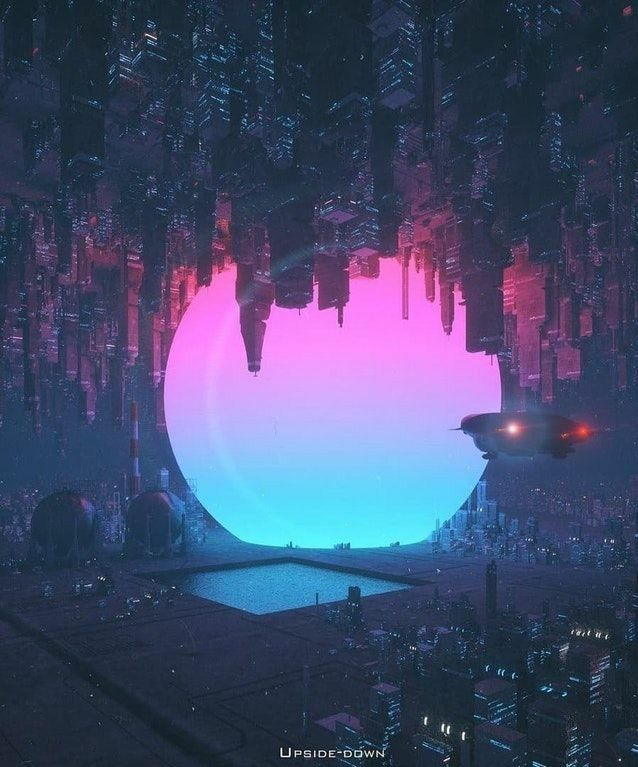

### **Ensinando as cores para o nosso algoritmo**

Para que possamos perguntar que cor é a apontada pelo cursor do mouse, antes, precisamos ensinar ao nosso algoritmo os nomes das cores e suas respectivas escalas RGB. Para isso, eu achei um arquivo `.csv` em um [repositório no GitHub](https://github.com/codebrainz/color-names/blob/master/output/colors.csv) com aproximadamente 900 cores distintas com seus respectivos nomes, escalas hexadecimal e RGB, dispostas da seguinte forma: 

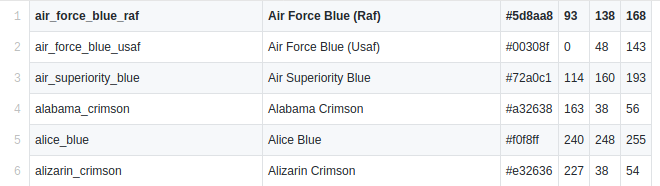

Agora, precisamos importar essa tabela para o nosso projeto. Eu deixei esse arquivo na pasta `/dataset` deste notebook. No entanto, perceba na imagem acima que a tabela não possui um cabeçalho indicando qual coluna significa qual atributo, então, teremos que também fazer essa inclusão no código.

In [ ]:
headers = ['color', 'color_name', 'hex', 'R', 'G', 'B']
csv = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Color Recognizer/dataset/colors.csv', names=headers, header=None)

###**Algumas funções...**

Para encapsular nosso código e deixá-lo mais limpo, precisamos definir algumas funções antes e definir algumas variáveis globais que nos ajudarão futuramente.

In [ ]:
# To find out if the image was clicked
clicked = False 

# RGB values
r = g = b = 0 

# cursor position on the Cartesian plane
xpos = ypos = 0 

* **Função para identificar a cor**: Vai ser chamada quando o usuário realizar um duplo clique sobre a área da imagem. Retorna o nome da cor clicada e as suas escalas RGB.

In [ ]:
def identify_color(red, green, blue):
  minimum = 10000  
  color_name = ''
  for i in range(len(csv)):
    # loc = retrieves the values in data frame cells. loc [row, column]  
    absolute_value = abs(red - int(csv.loc[i, 'R'])) + abs(green - int(csv.loc[i, 'G'])) + abs(Bblue - int(csv.loc[i, 'B']))  
    if absolute_value <= minimum:  
      minimum = absolute_value 
      color_name = csv.loc[i, 'color_name']  
  return color_name

* **Função do duplo clique do mouse**: Essa função vai ser responável por nos dizer quando o evento associado ao mouse é um clique duplo. Quando isso ocorrer, pegamos os valores RGB da cor que foi clicada.

In [ ]:
def mouse_click(event, x, y, flags, param):
  if event == cv2.EVENT_LBUTTONDBLCLK:
    # taking the global variables we defined earlier
    global b, g, r, xpos, ypos, clicked 

    clicked = True  
    xpos = x  
    ypos = y  

    # taking the RGB values
    b, g, r = img[y, x]  
    b = int(b)  
    g = int(g)  
    r = int(r)

###**Abrindo a imagem usando OpenCV**

Já estamos quase acabando, eu juro!

Para que consigamos fazer o algoritmo estar constantemente monitorando os cliques do cursor do mouse, precisamos abrir essa imagem em uma janela que o OpenCV nos disponibiliza. Para isso, iniciamos uma janela com o nome *Color Recognizer* e depois indicamos para o OpenCV chamar nossa função `mouse_click` toda vez que ocorrer algum evento do mouse.

**Disclaimer:** Daqui em diante não executarei mais os trechos no notebook pois nem o Google Colab, nem o Jupyter Notebook suportam tais métodos do OpenCV, mas se você executar na sua máquina local, tudo irá funcionar normalmente :)

In [ ]:
cv2.namedWindow('Color Recognizer')

cv2.setMouseCallback('Color Recognizer', mouse_click)

O seguinte trecho de código é o nosso *Startup script*, isto é, são as primeiras funções que serão executadas e responsáveis por fazer nossa aplicação rodar de maneira correta.

In [ ]:
while 1:
  cv2.imshow('Color Recognizer', img)  
  if clicked:
    # image, startpoint, endpoint, color, thickness)-1 fills entire rectangle   
    cv2.rectangle(img, (20, 20), (750, 60), (b, g, r), -1)

    # displaying the color name and RGB values  
    text = recognize_color(r, g, b) + ' R=' + str(r) + ' G=' + str(g) +  ' B=' + str(b)

    # imgage, text, start, font(0-7), fontScale, color, thickness, lineType  
    cv2.putText(img, text, (50, 50), 2, 0.8, (255, 255, 255), 2, cv2.LINE_AA)

    # for very light colours we will display text in black colour  
    if r + g + b >= 600:  
      cv2.putText(img, text, (50, 50), 2, 0.8, (0, 0, 0), 2, cv2.LINE_AA)

    clicked = False

    # break the loop when user hits 'esc' key      
    if cv2.waitKey(20) & 0xFF == 27:  
        cv2.destroyAllWindows()

# Resultados

Pronto! Você acaba de criar o seu primeiro programa de visão computacional :)

Agora salve tudo e execute o seguinte comando no seu terminal para ver seu programa funcionando:


```
python <seu arquivo python>.py
```

Apenas para fins demonstrativos, a seguir estão alguns prints dos meus resultados obtidos. 

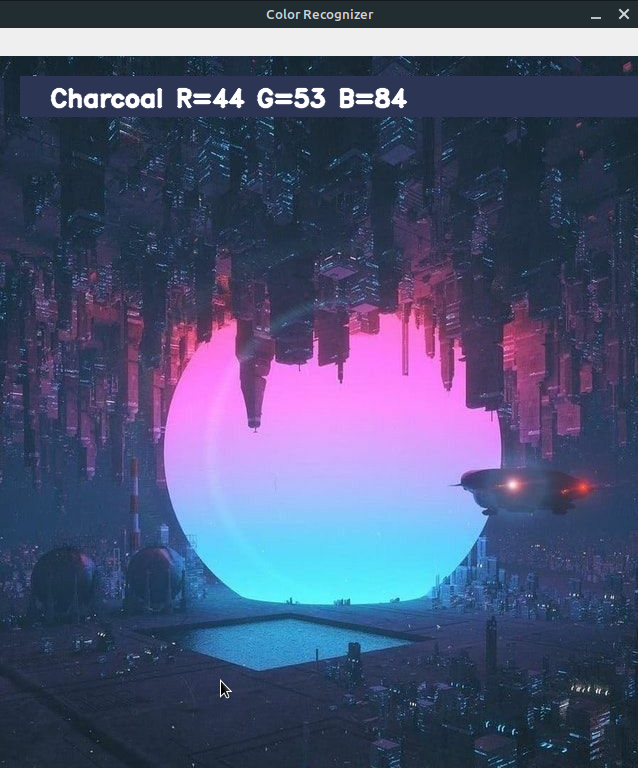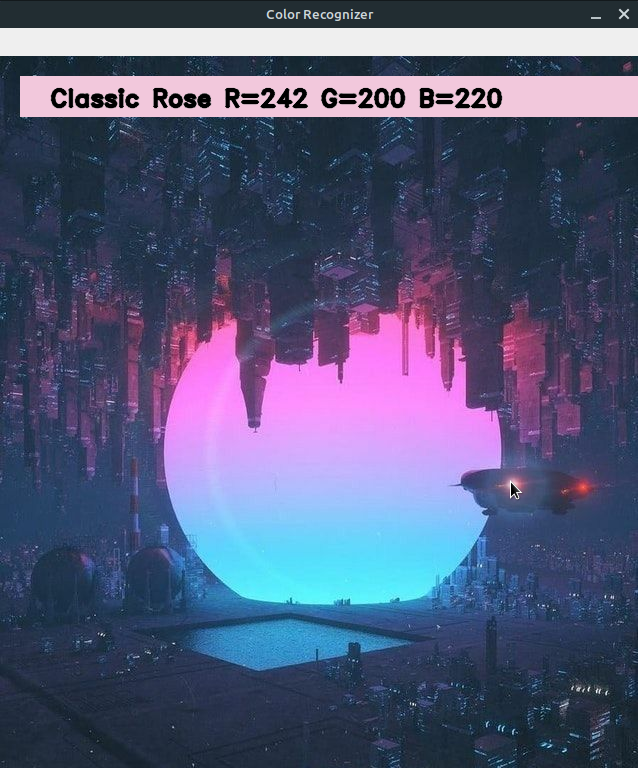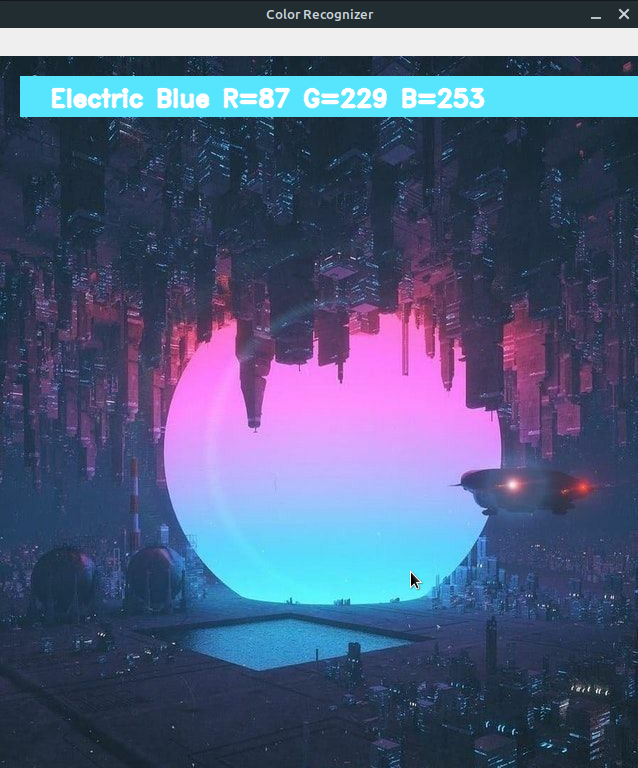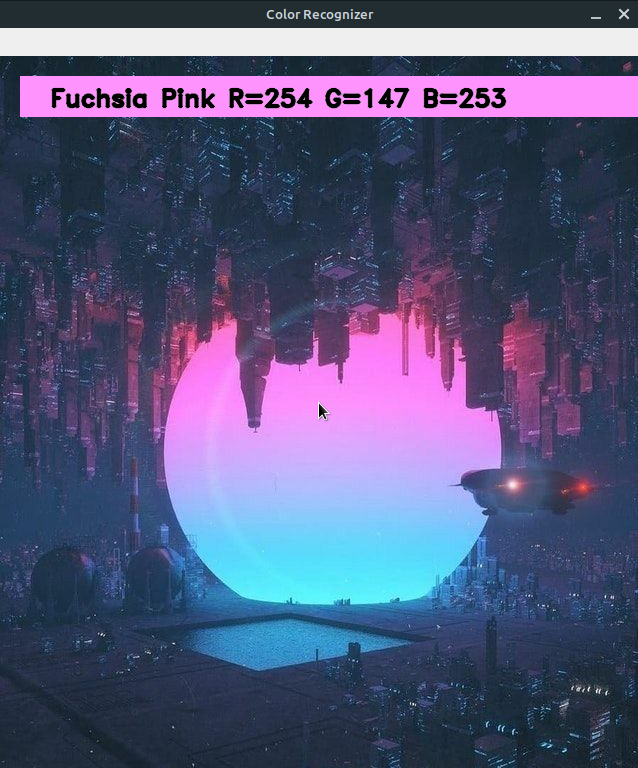